In [596]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [597]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [598]:
print(crop.isnull().sum())
print(crop.duplicated().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
0


In [599]:
crop_dict = {label: idx for idx, label in enumerate(crop['label'].unique())}
crop['label_num'] = crop['label'].map(crop_dict)

In [600]:
X = crop.drop(['label', 'label_num'], axis=1)
y = crop['label_num']

In [601]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [602]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [603]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [604]:
model_performance = []
for name,model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    model_performance.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create DataFrame for performance comparison
performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)
performance_df.reset_index(drop=True, inplace=True)
performance_df

C:\Users\revan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.990050,0.990292,0.990050,0.989948
1,Naive Bayes,0.990050,0.990292,0.990050,0.989948
2,Gradient Boosting,0.990050,0.990352,0.990050,0.990067
3,Decision Tree,0.977612,0.979401,0.977612,0.977019
4,K-Nearest Neighbors,0.965174,0.968589,0.965174,0.964925
5,Support Vector Machine,0.962687,0.961654,0.962687,0.960169
6,Logistic Regression,0.940299,0.938908,0.940299,0.938075


In [605]:
best_model_name = performance_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: Random Forest


In [606]:
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

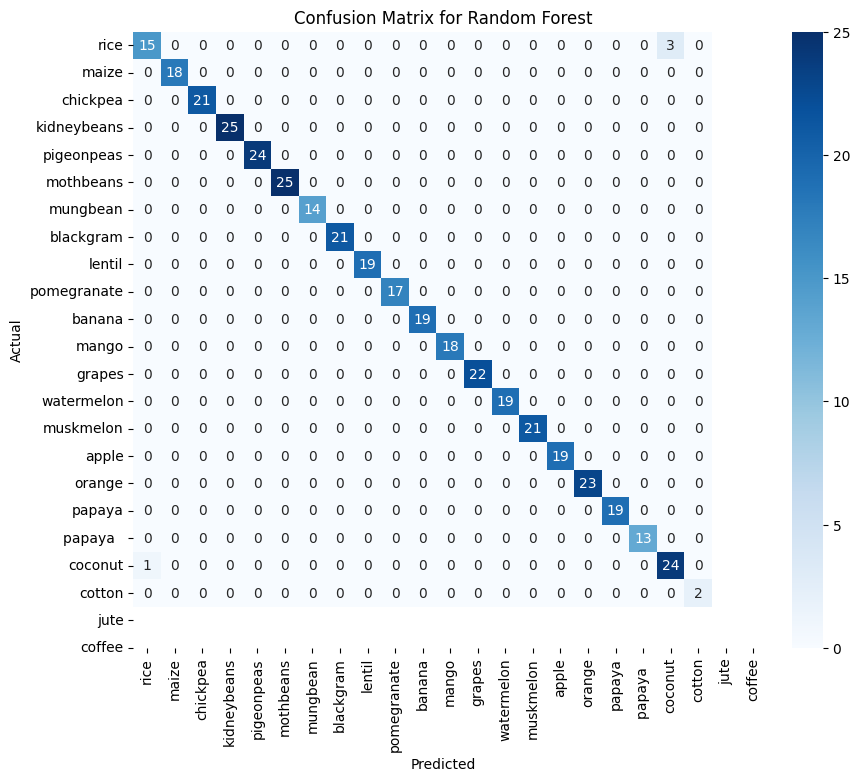

In [607]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=crop_dict.keys(), yticklabels=crop_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 0.001610201180663589
MAE: 0.031680669698516795
R2 Score: 0.9999999999968465


In [608]:
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    input_scaled = scaler.transform(input_features)
    print(input_scaled)
    prediction = best_model.predict(input_scaled)
    crop_name = list(crop_dict.keys())[list(crop_dict.values()).index(prediction[0])]
    return input_scaled

In [609]:
recommended_crop = recommend_crop(23,45,23,34.12036889,56.18080728,9.908770059,250.3982055)
print(f"Recommended Crop: {recommended_crop}")

[[-0.73181956 -0.34400818 -0.51005056  1.63073823 -0.6553672   4.33230878
   2.89496033]]
Recommended Crop: [[-0.73181956 -0.34400818 -0.51005056  1.63073823 -0.6553672   4.33230878
   2.89496033]]


C:\Users\revan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [610]:
import pickle
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [611]:
from sklearn.metrics import mean_squared_error
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [612]:
df=pd.read_csv('yield.csv')

In [613]:
df.columns = df.columns.str.strip()
df.replace("", pd.NA, inplace=True)
df.dropna(subset=['Area', 'Production'], inplace=True)
df = df[df['Production'] > 0]
df = df[df['Area'] > 0]

In [614]:

le_district = LabelEncoder()
le_crop = LabelEncoder()
df['District_Code'] = le_district.fit_transform(df['District_Name'])
df['Crop_Code'] = le_crop.fit_transform(df['Crop'])
X = df[['District_Code', 'Crop_Code']]
df['pp']=df['Production']/df['Area']
y = df['pp']
df = pd.read_csv("yield.csv")
df.dropna(subset=['Area', 'Production'], inplace=True)

In [615]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

Mean Squared Error: 918364.46


In [616]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(X_train)
# Save it
with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler1, f)
with open("yieldmodel.pkl", "wb") as f:
    pickle.dump(model, f)  # ✅ This is correct


In [617]:
def predict_yield(state, district, year, season, crop, area_input):
    model = joblib.load("yieldmodel.pkl")
    le_state, le_district, le_season, le_crop = joblib.load("label_encoders.pkl")

    try:
        district_code = le_district.transform([district])[0]
        crop_code = le_crop.transform([crop])[0]
    except ValueError as e:
        return f"Error: {e}"

    input_features = [[district_code,crop_code]]
    predicted_production = model.predict(input_features)[0]

    # Calculate yield = production / area
    predicted_yield = predicted_production / area_input if area_input > 0 else 0
    return {
        "Predicted Production (tonnes)": round(predicted_production, 2),
        "Predicted Yield (tonnes/ha)": round(predicted_yield, 2)
    }

In [618]:
with open('label.pkl','wb') as l:
    pickle.dump(le_crop,l)
with open('dist.pkl','wb') as dist:
    pickle.dump(le_district,dist)

In [619]:
print(f"Type of yieldmodel: {type(model)}")


Type of yieldmodel: <class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("tnrg.csv")

# Rename columns to clean names (as done before)
df.columns = [
    "id", "serial_no", "district_name", "monsoon_recharge_rainfall",
    "monsoon_recharge_other_sources", "non_monsoon_recharge_rainfall",
    "non_monsoon_recharge_other_sources", "total_annual_recharge",
    "total_natural_discharges", "annual_extractable_gw_resource",
    "annual_extraction_irrigation", "annual_extraction_industrial",
    "annual_extraction_domestic", "total_annual_extraction",
    "gw_allocation_domestic_2025", "net_gw_availability_future",
    "gw_extraction_stage_percent"
]

# Function to get water data for a district
def get_water_report(district):
    record = df[df["district_name"].str.lower() == district.lower()]
    
    if record.empty:
        return f"District '{district}' not found in dataset."
    
    record = record.iloc[0]  # Get the first matching row

    # Water in Monsoon
    monsoon_water = (
        record["monsoon_recharge_rainfall"] +
        record["monsoon_recharge_other_sources"]
    )

    # Water in Half-Yearly (Non-Monsoon)
    non_monsoon_water = (
        record["non_monsoon_recharge_rainfall"] +
        record["non_monsoon_recharge_other_sources"]
    )

    # Total Water Used
    total_used = (
        record["annual_extraction_irrigation"] +
        record["annual_extraction_industrial"] +
        record["annual_extraction_domestic"]
    )

    # Total Water Available = Recharge - Natural Discharges
    total_available = record["total_annual_recharge"] - record["total_natural_discharges"]-total_used

    # Print or return
    return {
        "district": record["district_name"],
        "monsoon_water": monsoon_water,
        "non_monsoon_water": non_monsoon_water,
        "total_water_used": total_used,
        "total_water_available": total_available
    }

# Example usage
district_input = input("Enter district name: ")
report = get_water_report(district_input)

if isinstance(report, dict):
    print(f"\nWater Report for {report['district']}:")
    print(f"Water in Monsoon: {report['monsoon_water']} million cubic metres")
    print(f"Water in Half-Yearly (Non-Monsoon): {report['non_monsoon_water']} million cubic metres")
    print(f"Total Water Used: {report['total_water_used']} million cubic metres")
    print(f"Total Water Available: {report['total_water_available']} million cubic metres")
else:
    print(report)



Water Report for Karur:
Water in Monsoon: 29972.6 units
Water in Half-Yearly (Non-Monsoon): 3961.5600000000004 units
Total Water Used: 30384.940000000002 units
Total Water Available: 271.0400000000009 units


In [19]:
def debug_water_report(district):
    record = df[df["district_name"].str.capitalize() == district.capitalize()]
    
    if record.empty:
        return f"District '{district}' not found in dataset."
    
    record = record.iloc[0]

    print("Monsoon Recharge from Rainfall:", record["monsoon_recharge_rainfall"])
    print("Monsoon Recharge from Other Sources:", record["monsoon_recharge_other_sources"])
    print("Non-Monsoon Recharge from Rainfall:", record["non_monsoon_recharge_rainfall"])
    print("Non-Monsoon Recharge from Other Sources:", record["non_monsoon_recharge_other_sources"])
    print("Total Annual Recharge:", record["total_annual_recharge"])
    print("Total Natural Discharges:", record["total_natural_discharges"])
    print("Irrigation:", record["annual_extraction_irrigation"])
    print("Industrial:", record["annual_extraction_industrial"])
    print("Domestic:", record["annual_extraction_domestic"])

    # Then call the original report function
    return get_water_report(district)


In [20]:
debug_water_report('Ariyalur')

Monsoon Recharge from Rainfall: 15860.02
Monsoon Recharge from Other Sources: 18903.42
Non-Monsoon Recharge from Rainfall: 2272.86
Non-Monsoon Recharge from Other Sources: 2066.82
Total Annual Recharge: 39103.12
Total Natural Discharges: 3581.87
Irrigation: 17284.99
Industrial: 70.24
Domestic: 1122.72


{'district': 'Ariyalur',
 'monsoon_water': np.float64(34763.44),
 'non_monsoon_water': np.float64(4339.68),
 'total_water_used': np.float64(18477.950000000004),
 'total_water_available': np.float64(35521.25)}

In [10]:
print(df["district_name"].unique())


['Ariyalur' 'Chengalpattu' 'Chennai' 'Coimbatore' 'Cuddalore' 'Dharmapuri'
 'Dindigul' 'Erode' 'Kallakkurichi' 'Kancheepuram' 'Kanniyakumari' 'Karur'
 'Krishnagiri' 'Madurai' 'Mayiladuthurai' 'Nagapattinam' 'Namakkal'
 'Perambalur' 'Pudukkottai' 'Ramanathapuram' 'Ranipet' 'Salem' 'Sivaganga'
 'Tenkasi' 'Thanjavur' 'The Nilgiris' 'Theni' 'Thiruvallur' 'Thiruvarur'
 'Thoothukkudi' 'Tiruchirappalli' 'Tirunelveli' 'Tirupathur' 'Tiruppur'
 'Tiruvannamalai' 'Vellore' 'Viluppuram' 'Virudhunagar' 'Total(Ham)'
 'Total (Bcm)']
